In [3]:
import torch

def compute_z(a, b, c):
    r1 = torch.sub(a, b)
    r2 = torch.mul(r1, 2)
    z = torch.add(r2, c)
    return z

print('Scalar Inputs:', compute_z(torch.tensor(1), torch.tensor(2), torch.tensor(3)))
print('Rank 1 Inputs:', compute_z(torch.tensor([1]), torch.tensor([2]), torch.tensor([3])))
print('Rank 2 Inputs:', compute_z(torch.tensor([[1]]), torch.tensor([[2]]), torch.tensor([[3]])))

Scalar Inputs: tensor(1)
Rank 1 Inputs: tensor([1])
Rank 2 Inputs: tensor([[1]])


In [ ]:
a = torch.tensor(3.14, requires_grad=True)
b = torch.tensor([1.0, 2.0, 3.0], requires_grad=True) 
print(a)
print(b)

In [ ]:
a.requires_grad

In [ ]:
w = torch.tensor([1.0, 2.0, 3.0])

print(w.requires_grad)

In [ ]:

w.requires_grad_()

print(w.requires_grad)

In [4]:
import torch.nn as nn

torch.manual_seed(1)
w = torch.empty(2, 3)
nn.init.xavier_normal_(w)
print(w)

tensor([[ 0.4183,  0.1688,  0.0390],
        [ 0.3930, -0.2858, -0.1051]])


In [ ]:
w = torch.tensor(1.0, requires_grad = True)
b = torch.tensor(0.5, requires_grad= True)
x = torch.tensor([1.4])
y = torch.tensor([2.1])
z = torch.add(torch.mul(w, x), b)
loss = (y - z).pow(2).sum()
loss.backward()
print('dL / dw : ', w.grad)
print('dl/db : ', b.grad)

In [ ]:
# verifying the computed gradient
print(2 * x * ((w * x + b) - y))

In [ ]:
model = nn.Sequential(
    nn.Linear(4, 16),
    nn.ReLU(),
    nn.Linear(16, 32),
    nn.ReLU()
)

model

##### Configuring layers

* Initializers nn.init: https://pytorch.org/docs/stable/nn.init.html

* L1 Regularizers nn.L1Loss: https://pytorch.org/docs/stable/ generated/torch.nn.L1Loss.html#torch.nn.L1Loss

* L2 Regularizers weight_decay: https://pytorch.org/docs/stable/optim.html

* Activations: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity


In [ ]:
nn.init.xavier_uniform_(model[0].weight)
 
l1_weight = 0.01
l1_penalty = l1_weight * model[2].weight.abs().sum()

In [ ]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

##### Solving an XOR classification problem

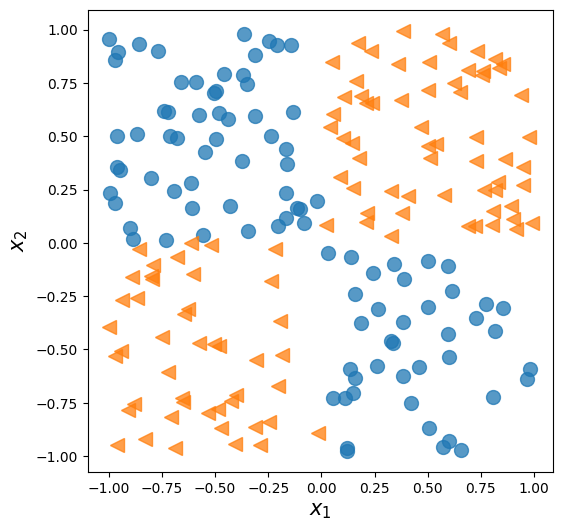

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(1)
torch.manual_seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], 
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], 
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)

#plt.savefig('figures/13_02.png', dpi=300)
plt.show()


In [35]:
from torch.utils.data import DataLoader, TensorDataset
 
    
train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [48]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [49]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [50]:
torch.manual_seed(1)
num_epochs = 200
def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()

        loss_hist_train[epoch] /= n_train/batch_size
        accuracy_hist_train[epoch] /= n_train/batch_size

        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

history = train(model, num_epochs, train_dl, x_valid, y_valid)

Text(0.5, 0, 'Epochs')

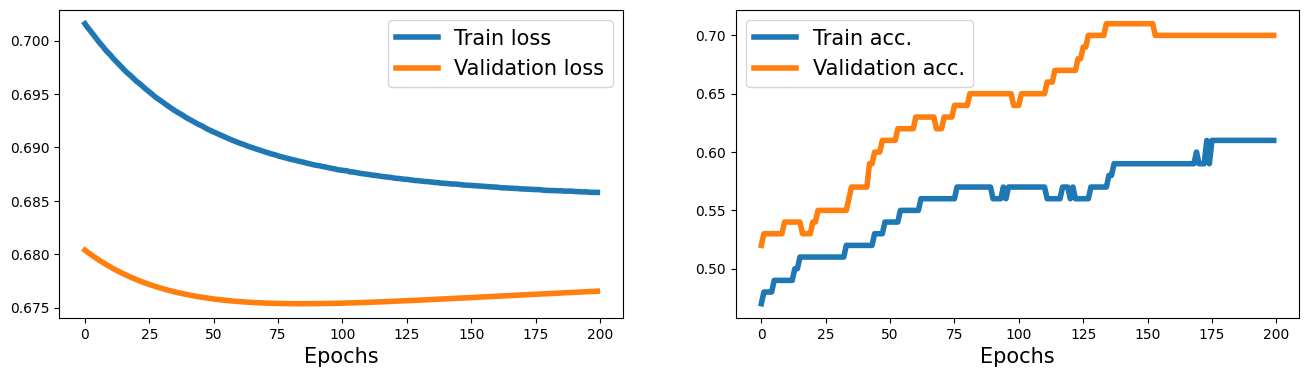

In [51]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

#plt.savefig('figures/13_03.png', dpi=300)

In [52]:
del model

In [53]:
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)
 
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

model

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)

In [54]:
history = train(model, num_epochs, train_dl, x_valid, y_valid)

Text(0.5, 0, 'Epochs')

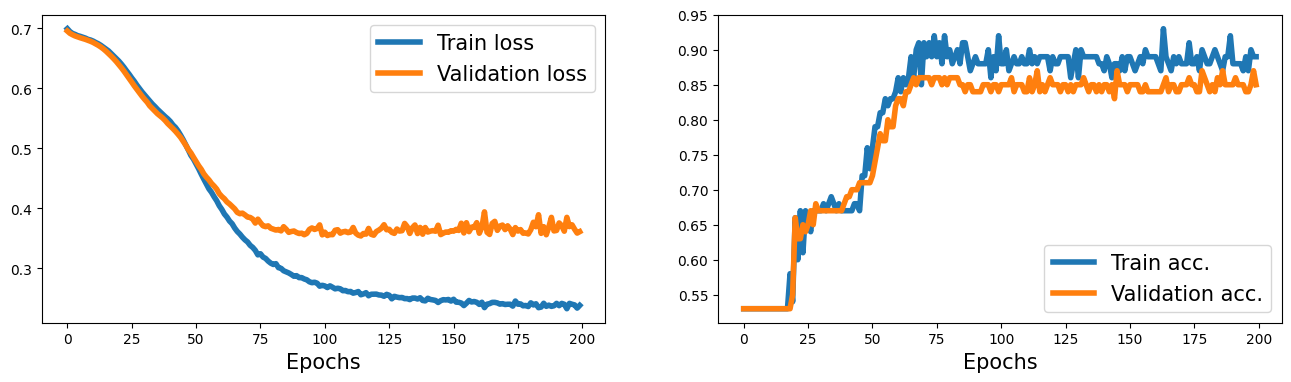

In [55]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

#plt.savefig('figures/13_04.png', dpi=300)

In [66]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2,4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4, 4)
        a2 = nn.ReLU()
        l3 = nn.Linear(4, 1)
        a3 = nn.Sigmoid()
        l = [l1, a1, l2, a2, l3, a3]
        self.module_list = nn.ModuleList(l)

    def forward(self, x):
        for f in self.module_list:
            x = f(x)
        return x
    
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:,0]
        return (pred >= 0.5).float()
    
model = MyModule()
model

MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [67]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.015)
history = train( model, num_epochs, train_dl, x_valid, y_valid)

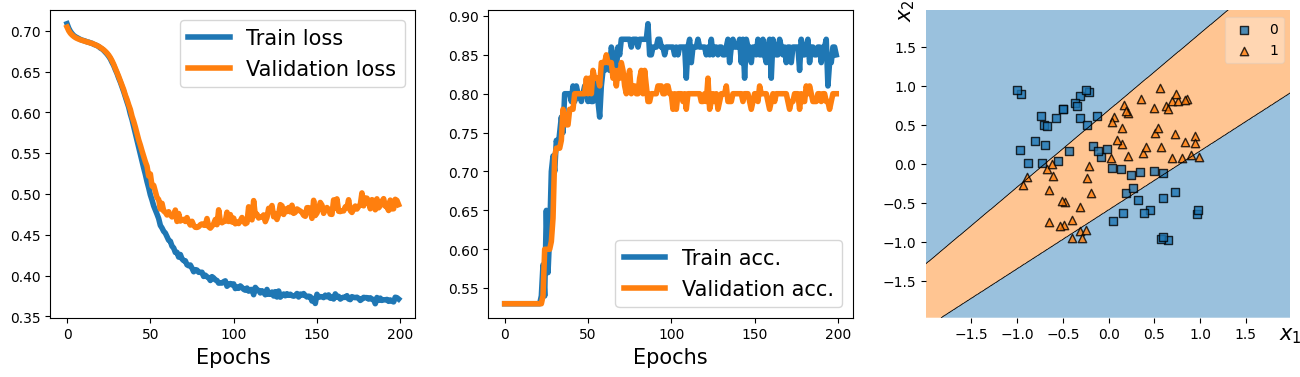

In [68]:

from mlxtend.plotting import plot_decision_regions
fig = plt.figure(figsize=(16, 4))

ax = fig.add_subplot(1,3,1)
plt.plot(history[0], lw = 4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)


ax = fig.add_subplot(1,3,2)
plt.plot(history[2], lw = 4)
plt.plot(history[3], lw = 4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size = 15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid.numpy(), 
                      y=y_valid.numpy().astype(np.int64),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [69]:
class NoisyLinear(nn.Module):
    def __init__(self, input_size, output_size, noise_stddev=0.1):
        super().__init__()
        w = torch.Tensor(input_size, output_size)
        self.w = nn.Parameter(w)  # nn.Parameter is a Tensor that's a module parameter.
        nn.init.xavier_uniform_(self.w)
        b = torch.Tensor(output_size).fill_(0)
        self.b = nn.Parameter(b)
        self.noise_stddev = noise_stddev

    def forward(self, x, training=False):
        if training:
            noise = torch.normal(0.0, self.noise_stddev, x.shape)
            x_new = torch.add(x, noise)
        else:
            x_new = x
        return torch.add(torch.mm(x_new, self.w), self.b) 

In [72]:
## testing:

torch.manual_seed(1)

noisy_layer = NoisyLinear(4, 2)
 
x = torch.zeros((1, 4))
print(noisy_layer(x, training=True))

print(noisy_layer(x, training=True))
 
print(noisy_layer(x, training=False))

#print(noisy_layer(x, training=False).shape)

tensor([[ 0.1154, -0.0598]], grad_fn=<AddBackward0>)
tensor([[ 0.0432, -0.0375]], grad_fn=<AddBackward0>)
tensor([[0., 0.]], grad_fn=<AddBackward0>)
torch.Size([1, 2])


In [73]:
class MyNoisyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = NoisyLinear(2, 4, 0.07)
        self.a1 = nn.ReLU()
        self.l2 = nn.Linear(4, 4)
        self.a2 = nn.ReLU()
        self.l3 = nn.Linear(4, 1)
        self.a3 = nn.Sigmoid()
        
    def forward(self, x, training=False):
        x = self.l1(x, training)
        x = self.a1(x)
        x = self.l2(x)
        x = self.a2(x)
        x = self.l3(x)
        x = self.a3(x)
        return x
    
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred>=0.5).float()

torch.manual_seed(1)
model = MyNoisyModule()
model

MyNoisyModule(
  (l1): NoisyLinear()
  (a1): ReLU()
  (l2): Linear(in_features=4, out_features=4, bias=True)
  (a2): ReLU()
  (l3): Linear(in_features=4, out_features=1, bias=True)
  (a3): Sigmoid()
)

In [74]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
    
torch.manual_seed(1)

loss_hist_train = [0] * num_epochs
accuracy_hist_train = [0] * num_epochs
loss_hist_valid = [0] * num_epochs
accuracy_hist_valid = [0] * num_epochs
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch, True)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train[epoch] += loss.item()
        is_correct = ((pred>=0.5).float() == y_batch).float()
        accuracy_hist_train[epoch] += is_correct.mean()

    loss_hist_train[epoch] /= n_train/batch_size
    accuracy_hist_train[epoch] /= n_train/batch_size

    pred = model(x_valid)[:, 0]
    loss = loss_fn(pred, y_valid)
    loss_hist_valid[epoch] = loss.item()
    is_correct = ((pred>=0.5).float() == y_valid).float()
    accuracy_hist_valid[epoch] += is_correct.mean()

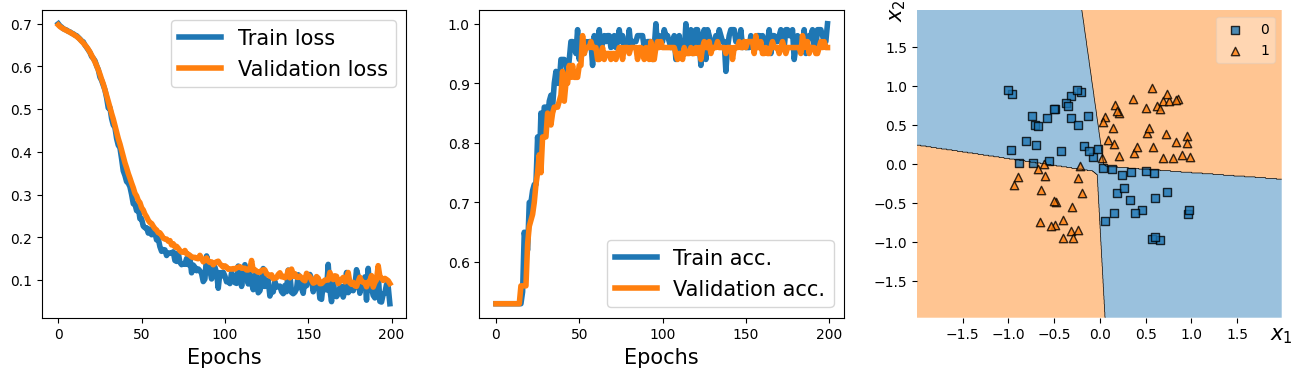

In [75]:
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(loss_hist_train, lw=4)
plt.plot(loss_hist_valid, lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(accuracy_hist_train, lw=4)
plt.plot(accuracy_hist_valid, lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid.numpy(), 
                      y=y_valid.numpy().astype(np.int64),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)

In [1]:

import pytorch_lightning as pl
import torch
import torch.nn as nn

from torchmetrics import Accuracy

class MultiLayerPerceptron(pl.LightningModule):
    def __init__(self, image_shape=(1,28,28), hidden_units=(32,16)):
        super().__init__()

        #new PL attributes:
        self.train_acc = Accuracy(task='multiclass', num_classes=10)
        self.valid_acc = Accuracy(task='multiclass', num_classes=10)
        self.test_acc = Accuracy(task='multiclass', num_classes=10)

        #Model
        input_size = image_shape[0] * image_shape[1] * image_shape[2]
        all_layers = [nn.Flatten()]
        for hidden_unit in hidden_units:
            layer = nn.Linear(input_size,hidden_unit)
            all_layers.append(layer)
            all_layers.append(nn.ReLU())
            input_size = hidden_unit
        all_layers.append(nn.Linear(hidden_units[-1], 10))
        self.model = nn.Sequential(*all_layers)

    def forward(self, x):
        x = self.model(x)
        return x
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = nn.functional.cross_entropy(self(x), y)
        preds = torch.argmax(logits, dim=1)
        self.train_acc.update(preds, y)
        self.log('train_loss', loss, prog_bar=True)
        return loss
    
    def on_training_epoch_end(self, outs):
        self.log("train_acc", self.train_acc.compute())
        #self.train_acc.reset()

    def validation_step(self, batch, batch_idx):
        x,y = batch
        logits = self(x)
        loss = nn.functional.cross_entropy(self(x), y)
        preds = torch.argmax(logits, dim=1)
        self.valid_acc.update(preds, y)
        self.log("valid_loss", loss, prog_bar=True)
        self.log("valid_acc", self.valid_acc.compute(), prog_bar=True)
        return loss
    
    def test_step(self, batch, batch_idx):
        x,y = batch
        logits = self(x)
        loss = nn.functional.cross_entropy(self(x), y)
        preds = torch.argmax(logits, dim = 1)
        self.test_acc.update(preds, y)
        self.log("test_loss", loss, prog_bar = True)
        self.log("test_acc", self.test_acc.compute(), prog_bar=True)
        return loss
    
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr = 0.001)
        return optimizer

In [2]:
from pytorch_lightning.utilities.types import EVAL_DATALOADERS
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.datasets import MNIST
from torchvision import transforms

class MnistDataModule(pl.LightningDataModule):
    def __init__(self, data_path='./'):
        super().__init__()
        self.data_path = data_path
        self.transform = transforms.Compose([transforms.ToTensor()])

    def prepare_data(self):
        MNIST(root=self.data_path, download=True)

    def setup(self, stage=None):
        mnist_all = MNIST(
            root=self.data_path,
            train = True,
            transform=self.transform,
            download=False
        )

        self.train, self.val = random_split(
            mnist_all, [55000, 5000], generator=torch.Generator().manual_seed(1)
        )

        self.test = MNIST(
            root = self.data_path,
            train = False,
            transform=self.transform,
            download=False
        )

    def train_dataloader(self):
        return DataLoader(self.train, batch_size=64, num_workers=4)
    
    def val_dataloader(self):
        return DataLoader(self.val, batch_size=64, num_workers=4)
    
    def test_dataloader(self):
        return DataLoader(self.test, batch_size=64, num_workers=4)

In [3]:
from pytorch_lightning.callbacks import ModelCheckpoint
torch.manual_seed(1)
mnist_dm = MnistDataModule()

mnistclassifier = MultiLayerPerceptron()
callbacks = [ModelCheckpoint(save_top_k=1, mode='max', monitor="valid_acc")]
if torch.cuda.is_available():
    trainer = pl.Trainer(max_epochs=10, gpus=1)
else:
    trainer = pl.Trainer(max_epochs=10)

trainer.fit(model=mnistclassifier, datamodule=mnist_dm)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type               | Params
-------------------------------------------------
0 | train_acc | MulticlassAccuracy | 0     
1 | valid_acc | MulticlassAccuracy | 0     
2 | test_acc  | MulticlassAccuracy | 0     
3 | model     | Sequential         | 25.8 K
-------------------------------------------------
25.8 K    Trainable params
0         Non-trainable params
25.8 K    Total params
0.103     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 860/860 [02:22<00:00,  6.03it/s, v_num=2, train_loss=0.260, valid_loss=0.166, valid_acc=0.936]  

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 860/860 [02:22<00:00,  6.01it/s, v_num=2, train_loss=0.260, valid_loss=0.166, valid_acc=0.936]


In [9]:
%load_ext tensorboard
%tensorboard --logdir lightning_logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 13948), started 0:48:22 ago. (Use '!kill 13948' to kill it.)

In [7]:
path = 'lightning_logs/version_2/checkpoints/epoch=9-step=8600.ckpt'

if torch.cuda.is_available(): # if you have GPUs
    trainer = pl.Trainer(
        max_epochs=15, callbacks=callbacks, gpus=1
    )
else:
    trainer = pl.Trainer(
        max_epochs=15, callbacks=callbacks
    )

trainer.fit(model=mnistclassifier, datamodule=mnist_dm, ckpt_path=path)

Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at lightning_logs/version_2/checkpoints/epoch=9-step=8600.ckpt
d:\Work\ml_book\ml_book\Lib\site-packages\pytorch_lightning\trainer\call.py:243: UserWarning: Be aware that when using `ckpt_path`, callbacks used to create the checkpoint need to be provided during `Trainer` instantiation. Please add the following callbacks: ["ModelCheckpoint{'monitor': None, 'mode': 'min', 'every_n_train_steps': 0, 'every_n_epochs': 1, 'train_time_interval': None}"].
  rank_zero_warn(

  | Name      | Type               | Params
-------------------------------------------------
0 | train_acc | MulticlassAccuracy | 0     
1 | valid_acc | Multiclas

Epoch 14: 100%|██████████| 860/860 [02:22<00:00,  6.02it/s, v_num=3, train_loss=0.158, valid_loss=0.168, valid_acc=0.941]  

`Trainer.fit` stopped: `max_epochs=15` reached.


Epoch 14: 100%|██████████| 860/860 [02:23<00:00,  6.01it/s, v_num=3, train_loss=0.158, valid_loss=0.168, valid_acc=0.941]


In [10]:
trainer.test(model=mnistclassifier, datamodule=mnist_dm)

Testing DataLoader 0: 100%|██████████| 157/157 [00:07<00:00, 20.33it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   Runningstage.testing    ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9517738223075867     │
│         test_loss         │    0.1471894234418869     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.1471894234418869, 'test_acc': 0.9517738223075867}]